In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data=pd.read_csv("D:/pics and docx/Downloads/4th sem projects/Companies (1).csv")

In [4]:
data.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,611289.0,0.067,"2,100,000","Bentonville, Arkansas"
1,1,2,Amazon,Retail and cloud computing,513983.0,0.094,"1,540,000","Seattle, Washington"
2,2,3,ExxonMobil,Petroleum industry,413680.0,0.448,"62,000","Spring, Texas"
3,3,4,Apple,Electronics industry,394328.0,0.078,"164,000","Cupertino, California"
4,4,5,UnitedHealth Group,Healthcare,324162.0,0.127,"400,000","Minnetonka, Minnesota"


In [5]:
data.tail()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
95,95,96,Best Buy,Retail,46298.0,0.106,"71,100","Richfield, Minnesota"
96,96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159.0,0.005,"34,300","New York City, New York"
97,97,98,United Airlines,Airline,44955.0,0.825,"92,795","Chicago, Illinois"
98,98,99,Thermo Fisher Scientific,Laboratory instruments,44915.0,0.145,"130,000","Waltham, Massachusetts"
99,99,100,Qualcomm,Technology,44200.0,0.317,"51,000","San Diego, California"


In [6]:
data.describe()

,Unnamed: 0,Rank,Revenue (USD millions),Revenue growth
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,50.500000,117566.460000,0.195760
std,29.011492,29.011492,100915.112163,0.214634
min,0.000000,1.000000,44200.000000,0.005000
25%,24.750000,25.750000,57876.000000,0.043750
50%,49.500000,50.500000,80824.500000,0.117000
75%,74.250000,75.250000,138763.000000,0.236250
max,99.000000,100.000000,611289.000000,0.972000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              100 non-null    int64  
 1   Rank                    100 non-null    int64  
 2   Name                    100 non-null    object 
 3   Industry                100 non-null    object 
 4   Revenue (USD millions)  100 non-null    float64
 5   Revenue growth          100 non-null    float64
 6   Employees               100 non-null    object 
 7   Headquarters            100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [8]:
data.shape

(100, 8)

In [9]:
data.isnull().sum()

Unnamed: 0                0
Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [13]:
print(data.columns)


Index(['Unnamed: 0', 'Rank', 'Name', 'Industry', 'Revenue (USD millions)',
       'Revenue growth', 'Employees', 'Headquarters', 'cluster'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler

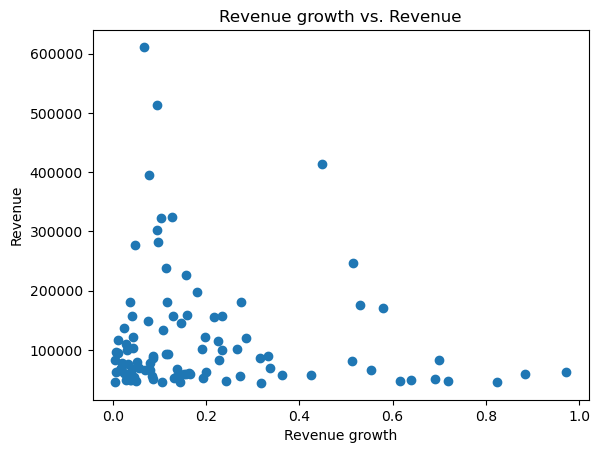

In [38]:
# Example scatter plot
plt.scatter(data['Revenue growth'], data['Revenue (USD millions)'])
plt.title('Revenue growth vs. Revenue')
plt.xlabel('Revenue growth')
plt.ylabel('Revenue')
plt.show()


Finally we can conclude that as the revenue increases, the rank decreases, both are inversly proportional to each other

In [60]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [61]:
y_predicted = km.fit_predict(data[['Revenue growth','Revenue (USD millions)']])
y_predicted

array([3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
data['cluster'] = y_predicted
data.head()

,Unnamed: 0,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,cluster
0,0,1,Walmart,Retail,611289.0,0.067,"2,100,000","Bentonville, Arkansas",3
1,1,2,Amazon,Retail and cloud computing,513983.0,0.094,"1,540,000","Seattle, Washington",3
2,2,3,ExxonMobil,Petroleum industry,413680.0,0.448,"62,000","Spring, Texas",1
3,3,4,Apple,Electronics industry,394328.0,0.078,"164,000","Cupertino, California",1
4,4,5,UnitedHealth Group,Healthcare,324162.0,0.127,"400,000","Minnetonka, Minnesota",1


In [63]:
km.cluster_centers_

array([[2.06088235e-01, 6.72780000e+04],
       [1.80888889e-01, 3.11234667e+05],
       [1.79666667e-01, 1.55017048e+05],
       [8.05000000e-02, 5.62636000e+05]])

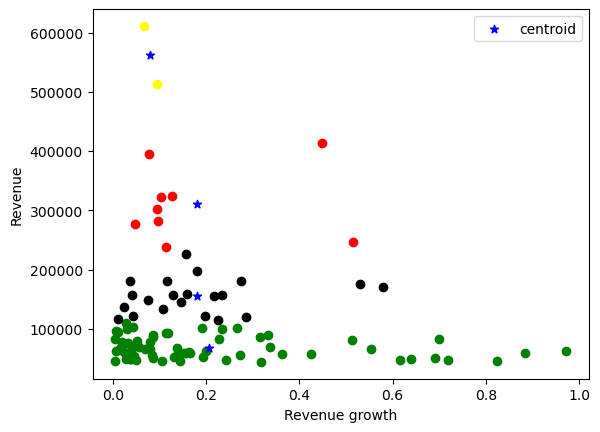

In [64]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]

plt.scatter(df1['Revenue growth'],df1['Revenue (USD millions)'],color='green')
plt.scatter(df2['Revenue growth'],df2['Revenue (USD millions)'],color='red')
plt.scatter(df3['Revenue growth'],df3['Revenue (USD millions)'],color='black')
plt.scatter(df4['Revenue growth'],df4['Revenue (USD millions)'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker="*",label='centroid')
plt.xlabel('Revenue growth')
plt.ylabel('Revenue')
plt.legend()
plt.show()

The scatter plot shows distinct clusters represented by different colors.

The points within each cluster (color) are grouped closely together, indicating that the algorithm has successfully separated the data into meaningful clusters based on the features.

The Blue "*" stars represents the centroids of each cluster. These centroids are the calculated mean positions of the data points within each cluster.

The algorithm has assigned each data point to one of the four clusters  and the scatter plot illustrates these assignments.


In [65]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Revenue growth','Revenue (USD millions)']])
    sse.append(km.inertia_)

In [66]:
sse

[1008202126437.4008,
 295936190410.9999,
 146431698240.9036,
 73562367437.23492,
 47825180298.38024,
 27448644147.161835,
 19421409386.63013,
 14687180568.629766,
 9953756598.139807]

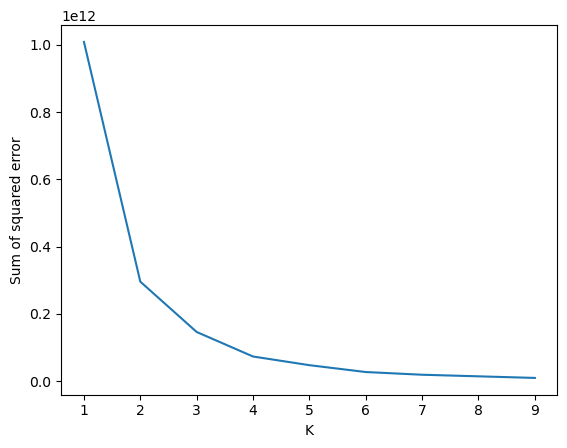

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Thus K-means is often used to segment large datasets into distinct groups or clusters based on similarity.Here the value of K is 4.